**Grupo C - Inteligencia Artificial, Principios y Técnicas - NRC: 11583 - Turno: Sábado <10:40 am - 12:25 pm>**

**Integrantes:**
*   **Guerrero Puicón, Halvert**
*   **Lopez Ortega, Alvaro**
*   **Ortiz Barboza, Anghelo**
*   **Rodriguez Lara, Franklin**
*   **Vasquez Saenz, Juan**

**Proyecto: Modelo de Predicción del Desempeño Académico de Estudiantes Basado en Factores Determinantes**

**1.Configurar acceso al API de Kaggle**

In [1]:
# 1. Instalar la librería de Kaggle
!pip install --quiet kaggle

# 2. Subir el archivo kaggle.json (credenciales)
from google.colab import files
print("Por favor, sube tu archivo kaggle.json descargado desde tu cuenta de Kaggle:")
files.upload()

# 3. Crear carpeta oculta para Kaggle y mover las credenciales
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# 4. Verificar instalación y configuración
!kaggle datasets list --user lainguyn123

Por favor, sube tu archivo kaggle.json descargado desde tu cuenta de Kaggle:


Saving kaggle.json to kaggle.json
ref                                        title                                   size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-----------------------------------------  --------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
lainguyn123/student-performance-factors    Student Performance Factors            96178  2024-11-26 14:13:57.537000          75553       1017  1.0              
lainguyn123/employee-survey                Employee Survey                        62604  2025-05-03 00:38:04.373000           4014         51  1.0              
lainguyn123/australia-car-market-data      Australia Car Market                  615794  2025-06-13 14:56:06.593000           1655         39  1.0              
lainguyn123/data-science-salary-landscape  Global Salaries for Data Science      240891  2024-09-29 02:11:44.057000           1238         36  1.0              


**2.Descargar y descomprimir el dataset**

In [2]:
# 1. Descargar el dataset desde Kaggle
!kaggle datasets download -d lainguyn123/student-performance-factors

# 2. Descomprimir el archivo ZIP
!unzip -q student-performance-factors.zip

# 3. Listar los archivos para verificar
!ls -lh

Dataset URL: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors
License(s): CC0-1.0
  0% 0.00/93.9k [00:00<?, ?B/s]
100% 93.9k/93.9k [00:00<00:00, 141MB/s]
total 732K
-rw-r--r-- 1 root root   71 Jun 28 13:24 kaggle.json
drwxr-xr-x 1 root root 4.0K Jun 26 13:35 sample_data
-rw-r--r-- 1 root root 627K Nov 26  2024 StudentPerformanceFactors.csv
-rw-r--r-- 1 root root  94K Nov 26  2024 student-performance-factors.zip


**3.Cargar librerías y datos**

In [3]:
# 1. Importar pandas para el manejo de datos
import pandas as pd

# 2. Cargar el CSV en un DataFrame
df = pd.read_csv('StudentPerformanceFactors.csv')

# 3. Mostrar tamaño del DataFrame y primeras filas
print("Shape del dataset:", df.shape)
df.head()

Shape del dataset: (6607, 20)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


**4.Análisis exploratorio de datos**

In [4]:
# 1. Mostrar información general del DataFrame
df.info()

# 2. Estadísticas descriptivas de variables numéricas
df.describe()

# 3. Verificar valores faltantes en cada columna
missing_counts = df.isnull().sum()
print("Valores faltantes por columna:\n", missing_counts)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

**5.Preprocesamiento de datos**

In [5]:
# 1. Rellenar valores faltantes en columnas categóricas con la moda
for col in ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# 2. Identificar columnas categóricas
cat_cols = df.select_dtypes(include=['object']).columns

# 3. Convertir columnas categóricas a variables dummy (One-Hot Encoding)
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# 4. Verificar nuevo shape y primeras columnas
print("Nuevo shape tras encoding:", df_encoded.shape)
df_encoded.head()

Nuevo shape tras encoding: (6607, 28)


/tmp/ipython-input-5-1004700003.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,Teacher_Quality_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
0,23,84,7,73,0,3,67,True,False,False,...,True,True,False,True,False,True,False,False,True,True
1,19,64,8,59,2,4,61,True,False,False,...,True,True,False,False,False,False,False,True,False,False
2,24,98,7,91,2,4,74,False,True,False,...,True,True,True,False,False,False,True,False,True,True
3,29,89,8,98,1,4,71,True,False,False,...,True,True,False,False,False,True,False,True,False,True
4,19,92,6,65,3,4,70,False,True,False,...,False,True,True,False,False,False,False,False,True,False


**6.División de datos y entrenamiento del modelo**

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Separar características y variable objetivo
X = df_encoded.drop('Exam_Score', axis=1)
y = df_encoded['Exam_Score']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar y entrenar el modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Métricas
mae = mean_absolute_error(y_test, y_pred)
# Calcular RMSE manualmente
rmse = mean_squared_error(y_test, y_pred) ** 0.5
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 1.18
RMSE: 2.23


**7.Ajuste de hiperparámetros y análisis de importancia de características**

In [7]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Definir espacio de búsqueda de hiperparámetros
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar y ejecutar RandomizedSearchCV
rand_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
rand_search.fit(X_train, y_train)

# Extraer el mejor modelo e imprimir los mejores parámetros
best_model = rand_search.best_estimator_
print("Mejores hiperparámetros:", rand_search.best_params_)

# Evaluar el mejor modelo en el conjunto de prueba
y_pred_best = best_model.predict(X_test)
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = mean_squared_error(y_test, y_pred_best) ** 0.5
print(f"MAE mejorado: {mae_best:.2f}")
print(f"RMSE mejorado: {rmse_best:.2f}")

# Obtener e imprimir las 10 características más importantes
importances = best_model.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)
feat_importances_sorted = feat_importances.sort_values(ascending=False)
print("Top 10 características más importantes:")
print(feat_importances_sorted.head(10))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Mejores hiperparámetros: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 20}
MAE mejorado: 1.12
RMSE mejorado: 2.14
Top 10 características más importantes:
Attendance                    0.449897
Hours_Studied                 0.272998
Previous_Scores               0.079532
Tutoring_Sessions             0.033910
Access_to_Resources_Low       0.017222
Parental_Involvement_Low      0.016927
Sleep_Hours                   0.014692
Physical_Activity             0.014323
Peer_Influence_Positive       0.008806
Access_to_Resources_Medium    0.008702
dtype: float64


**8.Visualización de importancias y guardado del modelo**

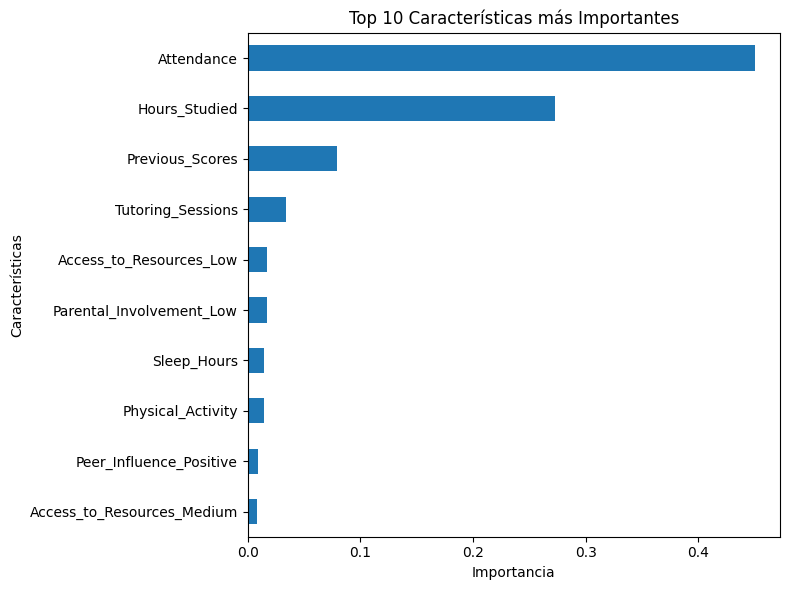

Modelo guardado como 'random_forest.pkl'


In [8]:
import matplotlib.pyplot as plt
import joblib

# 1. Gráfico de barras de las top 10 características
top_features = feat_importances_sorted.head(10)
plt.figure(figsize=(8, 6))
top_features.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Top 10 Características más Importantes')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.tight_layout()
plt.show()

# 2. Guardar el modelo en disco
joblib.dump(best_model, 'random_forest.pkl')
print("Modelo guardado como 'random_forest.pkl'")

**9.Carga del modelo y predicciones personalizadas**

In [9]:
import joblib
import pandas as pd

# 1. Cargar modelo guardado
loaded_model = joblib.load('random_forest.pkl')

# 2. Función para predecir nueva muestra
def predict_performance(new_student_dict):
    # Convertir a DataFrame
    new_df = pd.DataFrame([new_student_dict])

    # Mostrar datos en formato horizontal para exposición
    print("▶️ Datos del estudiante (formato horizontal):")
    from IPython.display import display, HTML
    display(HTML(new_df.to_html(index=False)))

    # Preprocesar: one-hot encoding y alinear columnas
    new_encoded = pd.get_dummies(new_df)
    new_encoded = new_encoded.reindex(columns=X.columns, fill_value=0)

    # Predecir
    score = loaded_model.predict(new_encoded)[0]

    # Mostrar resultado
    print(f"\n🎯 Puntuación estimada del estudiante: {score:.2f}")
    if score >= 60:
        print("✅ El estudiante aprueba.")
    else:
        print("❌ El estudiante desaprueba.")
    return score

# 3. Ejemplo completo de entrada

ejemplo_estudiante = {
    # 🧠 Rendimiento académico
    'Hours_Studied': 12,  # Horas de estudio por semana
    'Attendance': 95,     # Porcentaje de asistencia
    'Previous_Scores': 88,  # Puntajes anteriores
    'Tutoring_Sessions': 1, # Tutorías por mes

    # 💤 Hábitos y salud
    'Sleep_Hours': 8,         # Horas de sueño
    'Physical_Activity': 2,   # Horas de actividad física por semana

    # 👨‍👩‍👧 Entorno familiar y recursos
    'Access_to_Resources_Low': 0,
    'Access_to_Resources_Medium': 1,
    'Access_to_Resources_High': 0,

    'Parental_Involvement_Low': 0,
    'Parental_Involvement_Medium': 0,
    'Parental_Involvement_High': 1,

    'Family_Income_Low': 0,
    'Family_Income_Medium': 1,
    'Family_Income_High': 0,

    'Parental_Education_Level_High School': 0,
    'Parental_Education_Level_College': 1,
    'Parental_Education_Level_Postgraduate': 0,

    # 🏫 Escuela y entorno educativo
    'School_Type_Public': 0,
    'School_Type_Private': 1,
    'Teacher_Quality_Low': 0,
    'Teacher_Quality_Medium': 0,
    'Teacher_Quality_High': 1,

    'Motivation_Level_Low': 0,
    'Motivation_Level_Medium': 1,
    'Motivation_Level_High': 0,

    # 🤝 Influencia externa y social
    'Peer_Influence_Positive': 1,
    'Peer_Influence_Neutral': 0,
    'Peer_Influence_Negative': 0,

    'Extracurricular_Activities_Yes': 1,
    'Extracurricular_Activities_No': 0,
    'Internet_Access_Yes': 1,
    'Internet_Access_No': 0,
    'Learning_Disabilities_Yes': 0,
    'Learning_Disabilities_No': 1,

    # 🚗 Distancia y género
    'Distance_from_Home_Near': 1,
    'Distance_from_Home_Moderate': 0,
    'Distance_from_Home_Far': 0,
    'Gender_Male': 1,
    'Gender_Female': 0
}

# Ejecutar predicción
prediccion = predict_performance(ejemplo_estudiante)

▶️ Datos del estudiante (formato horizontal):


Hours_Studied,Attendance,Previous_Scores,Tutoring_Sessions,Sleep_Hours,Physical_Activity,Access_to_Resources_Low,Access_to_Resources_Medium,Access_to_Resources_High,Parental_Involvement_Low,Parental_Involvement_Medium,Parental_Involvement_High,Family_Income_Low,Family_Income_Medium,Family_Income_High,Parental_Education_Level_High School,Parental_Education_Level_College,Parental_Education_Level_Postgraduate,School_Type_Public,School_Type_Private,Teacher_Quality_Low,Teacher_Quality_Medium,Teacher_Quality_High,Motivation_Level_Low,Motivation_Level_Medium,Motivation_Level_High,Peer_Influence_Positive,Peer_Influence_Neutral,Peer_Influence_Negative,Extracurricular_Activities_Yes,Extracurricular_Activities_No,Internet_Access_Yes,Internet_Access_No,Learning_Disabilities_Yes,Learning_Disabilities_No,Distance_from_Home_Near,Distance_from_Home_Moderate,Distance_from_Home_Far,Gender_Male,Gender_Female
12,95,88,1,8,2,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0



🎯 Puntuación estimada del estudiante: 69.33
✅ El estudiante aprueba.
